In [252]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from statsmodels.formula.api import ols


In [253]:
Teams = pd.read_csv('/Users/jeongminjae/Desktop/Analyzing Baseball Data with R/baseball_R-master/data/lahman/baseballdatabank-2022.2/core/Teams.csv')
Teams

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,24,0.834,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,16,0.829,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,15,0.818,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,8,0.803,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,14,0.840,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2980,2021,NL,SLN,STL,C,2,162,81.0,90,72,...,137,0.986,St. Louis Cardinals,Busch Stadium III,2102530.0,92,92,STL,SLN,SLN
2981,2021,AL,TBA,TBD,E,1,162,81.0,100,62,...,130,0.986,Tampa Bay Rays,Tropicana Field,761072.0,92,91,TBR,TBA,TBA
2982,2021,AL,TEX,TEX,W,5,162,81.0,60,102,...,146,0.986,Texas Rangers,Globe Life Field,2110258.0,99,101,TEX,TEX,TEX
2983,2021,AL,TOR,TOR,E,4,162,80.0,91,71,...,122,0.984,Toronto Blue Jays,Sahlen Field,805901.0,102,101,TOR,TOR,TOR


In [254]:
my_teams = Teams[['teamID', 'yearID', 'lgID', 'G', 'W', 'L', 'R', 'RA']]
my_teams = my_teams[my_teams['yearID'] > 2000]
my_teams = my_teams.reset_index(drop = True)
my_teams

,teamID,yearID,lgID,G,W,L,R,RA
0,ANA,2001,AL,162,75,87,691,730
1,ARI,2001,NL,162,92,70,818,677
2,ATL,2001,NL,162,88,74,729,643
3,BAL,2001,AL,162,63,98,687,829
4,BOS,2001,AL,161,82,79,772,745
...,...,...,...,...,...,...,...,...
625,SLN,2021,NL,162,90,72,706,672
626,TBA,2021,AL,162,100,62,857,651
627,TEX,2021,AL,162,60,102,625,815
628,TOR,2021,AL,162,91,71,846,663


In [255]:
my_teams['RD'] = my_teams['R'] - my_teams['RA']
my_teams['Wpct'] = my_teams['W'] / (my_teams['L'] + my_teams['W'])
my_teams

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct
0,ANA,2001,AL,162,75,87,691,730,-39,0.462963
1,ARI,2001,NL,162,92,70,818,677,141,0.567901
2,ATL,2001,NL,162,88,74,729,643,86,0.543210
3,BAL,2001,AL,162,63,98,687,829,-142,0.391304
4,BOS,2001,AL,161,82,79,772,745,27,0.509317
...,...,...,...,...,...,...,...,...,...,...
625,SLN,2021,NL,162,90,72,706,672,34,0.555556
626,TBA,2021,AL,162,100,62,857,651,206,0.617284
627,TEX,2021,AL,162,60,102,625,815,-190,0.370370
628,TOR,2021,AL,162,91,71,846,663,183,0.561728


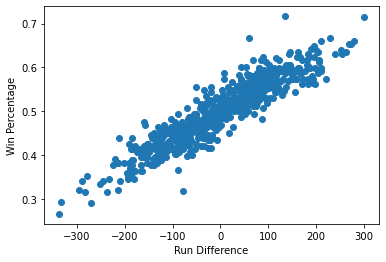

In [256]:
x = my_teams['RD']
y = my_teams['Wpct']
plt.xlabel('Run Difference')
plt.ylabel('Win Percentage')
run_diff = plt.scatter(x, y)
run_diff

In [257]:
x.array

<PandasArray>
[ -39,  141,   86, -142,   27,    3,   76, -115,   76,   17,
 ...
  -11, -224,   21,  -51,  210,   34,  206, -190,  183,  -96]
Length: 630, dtype: int64

In [258]:
LR = LinearRegression()
LR.fit(x.array.reshape(-1, 1), y)
print(LR.coef_)
print(LR.intercept_)

[0.00062484]
0.4999847749331176


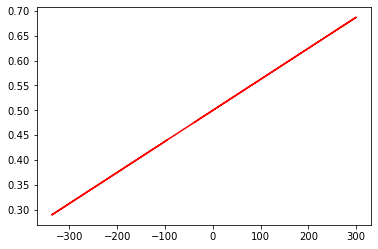

In [259]:
b = LR.intercept_
a = LR.coef_
plt.plot(x, a*x + b, color = 'red')
plt.show()

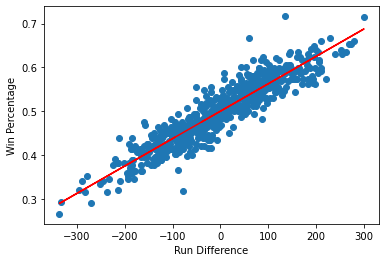

In [260]:
plt.scatter(x, y)
plt.plot(x, a*x + b, color = 'red')
plt.xlabel('Run Difference')
plt.ylabel('Win Percentage')
plt.show()

In [261]:
LR.predict(x.array.reshape(-1, 1))

array([0.47561603, 0.58808717, 0.55372099, 0.41125754, 0.51685545,
       0.50185929, 0.54747259, 0.42812821, 0.54747259, 0.51060705,
       0.40500915, 0.4987351 , 0.54872227, 0.41938046, 0.50873253,
       0.45874536, 0.50310897, 0.41125754, 0.55684518, 0.45562116,
       0.64932145, 0.51685545, 0.374392  , 0.48561346, 0.68743667,
       0.5318516 , 0.58121393, 0.36564425, 0.45124728, 0.50873253,
       0.62932658, 0.59058653, 0.58933685, 0.43375177, 0.62120367,
       0.53622548, 0.46686827, 0.4593702 , 0.43875049, 0.42500402,
       0.31940611, 0.45999504, 0.53372612, 0.40375947, 0.54372355,
       0.37876588, 0.5349758 , 0.51060705, 0.62495271, 0.49186186,
       0.59121137, 0.49123702, 0.44437405, 0.40438431, 0.57184134,
       0.604333  , 0.58683749, 0.34689906, 0.47561603, 0.49061218,
       0.4956109 , 0.51997964, 0.604333  , 0.45187212, 0.5949604 ,
       0.54747259, 0.5256032 , 0.38001556, 0.45062244, 0.47561603,
       0.28941381, 0.53685031, 0.57996425, 0.48061475, 0.51123

In [262]:
print(LR.coef_)
print(LR.intercept_)

[0.00062484]
0.4999847749331176


In [263]:
my_teams['.fitted'] = LR.predict(x.array.reshape(-1, 1))
my_teams['.resid'] = my_teams['Wpct'] - my_teams['.fitted']
my_teams

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,.fitted,.resid
0,ANA,2001,AL,162,75,87,691,730,-39,0.462963,0.475616,-0.012653
1,ARI,2001,NL,162,92,70,818,677,141,0.567901,0.588087,-0.020186
2,ATL,2001,NL,162,88,74,729,643,86,0.543210,0.553721,-0.010511
3,BAL,2001,AL,162,63,98,687,829,-142,0.391304,0.411258,-0.019953
4,BOS,2001,AL,161,82,79,772,745,27,0.509317,0.516855,-0.007539
...,...,...,...,...,...,...,...,...,...,...,...,...
625,SLN,2021,NL,162,90,72,706,672,34,0.555556,0.521229,0.034326
626,TBA,2021,AL,162,100,62,857,651,206,0.617284,0.628702,-0.011418
627,TEX,2021,AL,162,60,102,625,815,-190,0.370370,0.381265,-0.010895
628,TOR,2021,AL,162,91,71,846,663,183,0.561728,0.614330,-0.052602


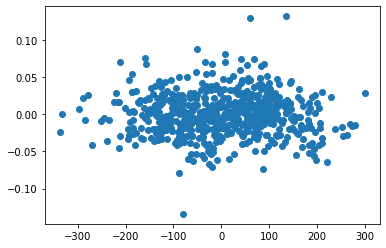

In [306]:
RD = my_teams['RD']
Resid = my_teams['.resid']
# for c, d in zip(RD, Resid) :
#     if d > -0.001 and d < 0.001 :
#         plt.scatter(c, d, marker = 'o', color = 'red')
#     else :
#         plt.scatter(c, d, color = 'skyblue')
plt.xlabel('')
plt.ylabel('Win Percentage')
plt.scatter(RD, Resid)
plt.show()

In [265]:
my_teams['abs(.resid)'] = abs(my_teams['.resid'])
top_resid = my_teams.sort_values(by = ['abs(.resid)'], ascending = False)
top_resid

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,.fitted,.resid,abs(.resid)
591,PIT,2020,NL,60,19,41,219,298,-79,0.316667,0.450622,-0.133956,0.133956
583,LAN,2020,NL,60,43,17,349,213,136,0.716667,0.584963,0.131704,0.131704
596,TBA,2020,AL,60,40,20,289,229,60,0.666667,0.537475,0.129192,0.129192
623,SEA,2021,AL,162,90,72,697,748,-51,0.555556,0.468118,0.087438,0.087438
477,TEX,2016,AL,162,95,67,765,757,8,0.586420,0.504983,0.081436,0.081436
...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,LAN,2006,NL,162,88,74,820,751,69,0.543210,0.543099,0.000111,0.000111
506,TBA,2017,AL,162,80,82,694,704,-10,0.493827,0.493736,0.000091,0.000091
607,CLE,2021,AL,162,80,82,717,727,-10,0.493827,0.493736,0.000091,0.000091
481,ATL,2017,NL,162,72,90,732,821,-89,0.444444,0.444374,0.000070,0.000070


In [266]:
top4 = top_resid.iloc[0:4]
top4

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,.fitted,.resid,abs(.resid)
591,PIT,2020,NL,60,19,41,219,298,-79,0.316667,0.450622,-0.133956,0.133956
583,LAN,2020,NL,60,43,17,349,213,136,0.716667,0.584963,0.131704,0.131704
596,TBA,2020,AL,60,40,20,289,229,60,0.666667,0.537475,0.129192,0.129192
623,SEA,2021,AL,162,90,72,697,748,-51,0.555556,0.468118,0.087438,0.087438


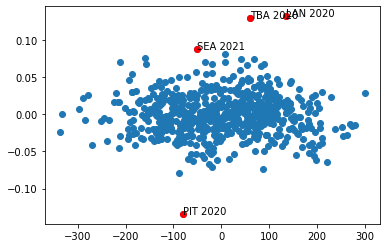

In [267]:
plt.scatter(RD, Resid)
a = 0
for e, f in zip(top4['RD'], top4['.resid']) :
    plt.scatter(e, f, marker = 'o', color = 'red')
    plt.text(e, f, top4.iloc[a,0] +' '+ str(top4.iloc[a, 1]))
    a += 1
plt.show()

In [268]:
SE = [g**2 for g in my_teams['.resid']]
MSE = np.mean(SE)
RMSE = MSE**(1/2)
RMSE

0.02831045325875236

In [269]:
#winpct = r^2/(r^2+ra^2) Pythagorean winrate
my_teams['Wpct_pyt'] = my_teams['R']**2 / (my_teams['R']**2 + my_teams['RA']**2)
my_teams['.resid_pyt'] = my_teams['Wpct'] - my_teams['Wpct_pyt']
my_teams

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,.fitted,.resid,abs(.resid),Wpct_pyt,.resid_pyt
0,ANA,2001,AL,162,75,87,691,730,-39,0.462963,0.475616,-0.012653,0.012653,0.472575,-0.009612
1,ARI,2001,NL,162,92,70,818,677,141,0.567901,0.588087,-0.020186,0.020186,0.593483,-0.025582
2,ATL,2001,NL,162,88,74,729,643,86,0.543210,0.553721,-0.010511,0.010511,0.562437,-0.019227
3,BAL,2001,AL,162,63,98,687,829,-142,0.391304,0.411258,-0.019953,0.019953,0.407147,-0.015843
4,BOS,2001,AL,161,82,79,772,745,27,0.509317,0.516855,-0.007539,0.007539,0.517793,-0.008476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,SLN,2021,NL,162,90,72,706,672,34,0.555556,0.521229,0.034326,0.034326,0.524658,0.030897
626,TBA,2021,AL,162,100,62,857,651,206,0.617284,0.628702,-0.011418,0.011418,0.634102,-0.016818
627,TEX,2021,AL,162,60,102,625,815,-190,0.370370,0.381265,-0.010895,0.010895,0.370313,0.000057
628,TOR,2021,AL,162,91,71,846,663,183,0.561728,0.614330,-0.052602,0.052602,0.619515,-0.057786


In [270]:
P_SE = [h**2 for h in my_teams['.resid_pyt']]
P_MSE = np.mean(P_SE)
P_RMSE = P_MSE**(1/2)
P_RMSE

0.02658632969001446

Text(0, 0.5, 'Win Percentage Pythagorean')

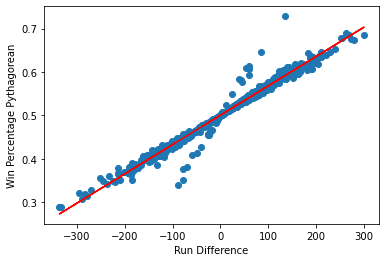

In [271]:
x = my_teams['RD']
y = my_teams['Wpct_pyt']
LR = LinearRegression()
LR.fit(x.array.reshape(-1, 1), y)
a = LR.coef_
b = LR.intercept_
plt.scatter(x, y)
plt.plot(x, a*x + b, color = 'red')
plt.xlabel('Run Difference')
plt.ylabel('Win Percentage Pythagorean')

In [272]:
print(a)
print(b)

[0.00067524]
0.5006313939428471


피타고라스 승률공식이 단순선형회귀모델 보다 결과 값이 더 좋게 나온다.
극단값에 대해 영향을 덜 받기 때문에

In [273]:
## 최적의 K 찾기 2 대신에
## W% = W/(W+L) = R**k/(R**k + RA**k)
## W/L = R**K/RA**K
## log(W/L) = k*log(R/RA)

In [274]:
my_teams['logW'] = np.log(my_teams['W']/my_teams['L'])
my_teams['logR'] = np.log(my_teams['R']/my_teams['RA'])
my_teams

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,.fitted,.resid,abs(.resid),Wpct_pyt,.resid_pyt,logW,logR
0,ANA,2001,AL,162,75,87,691,730,-39,0.462963,0.475616,-0.012653,0.012653,0.472575,-0.009612,-0.148420,-0.054905
1,ARI,2001,NL,162,92,70,818,677,141,0.567901,0.588087,-0.020186,0.020186,0.593483,-0.025582,0.273293,0.189191
2,ATL,2001,NL,162,88,74,729,643,86,0.543210,0.553721,-0.010511,0.010511,0.562437,-0.019227,0.173272,0.125529
3,BAL,2001,AL,162,63,98,687,829,-142,0.391304,0.411258,-0.019953,0.019953,0.407147,-0.015843,-0.441833,-0.187886
4,BOS,2001,AL,161,82,79,772,745,27,0.509317,0.516855,-0.007539,0.007539,0.517793,-0.008476,0.037271,0.035600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,SLN,2021,NL,162,90,72,706,672,34,0.555556,0.521229,0.034326,0.034326,0.524658,0.030897,0.223144,0.049357
626,TBA,2021,AL,162,100,62,857,651,206,0.617284,0.628702,-0.011418,0.011418,0.634102,-0.016818,0.478036,0.274928
627,TEX,2021,AL,162,60,102,625,815,-190,0.370370,0.381265,-0.010895,0.010895,0.370313,0.000057,-0.530628,-0.265436
628,TOR,2021,AL,162,91,71,846,663,183,0.561728,0.614330,-0.052602,0.052602,0.619515,-0.057786,0.248180,0.243744


In [275]:
LR_0 = LinearRegression(fit_intercept = False)
x3 = my_teams['logR']
y3 = my_teams['logW']
model2 = LR_0.fit(x3.array.reshape(-1, 1), y3)
model2

LinearRegression(fit_intercept=False)

In [276]:
model2.coef_

array([1.84411035])

In [277]:
model2.intercept_

0.0

In [278]:
model3 = ols('logW ~ 0 + logR', my_teams).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   logW   R-squared (uncentered):                   0.879
Model:                            OLS   Adj. R-squared (uncentered):              0.879
Method:                 Least Squares   F-statistic:                              4585.
Date:                Thu, 12 Jan 2023   Prob (F-statistic):                   4.41e-291
Time:                        15:17:33   Log-Likelihood:                          518.17
No. Observations:                 630   AIC:                                     -1034.
Df Residuals:                     629   BIC:                                     -1030.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
logR           1.8441      0.027     67.716      0.000       1.791       1.898
==============================================================================
Omnibus:                        9.337   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.311
Skew:                           0.278   Prob(JB):                      0.00951
Kurtosis:                       3.213   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [280]:
my_teams

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,.fitted,.resid,abs(.resid),Wpct_pyt,.resid_pyt,logW,logR
0,ANA,2001,AL,162,75,87,691,730,-39,0.462963,0.475616,-0.012653,0.012653,0.472575,-0.009612,-0.148420,-0.054905
1,ARI,2001,NL,162,92,70,818,677,141,0.567901,0.588087,-0.020186,0.020186,0.593483,-0.025582,0.273293,0.189191
2,ATL,2001,NL,162,88,74,729,643,86,0.543210,0.553721,-0.010511,0.010511,0.562437,-0.019227,0.173272,0.125529
3,BAL,2001,AL,162,63,98,687,829,-142,0.391304,0.411258,-0.019953,0.019953,0.407147,-0.015843,-0.441833,-0.187886
4,BOS,2001,AL,161,82,79,772,745,27,0.509317,0.516855,-0.007539,0.007539,0.517793,-0.008476,0.037271,0.035600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,SLN,2021,NL,162,90,72,706,672,34,0.555556,0.521229,0.034326,0.034326,0.524658,0.030897,0.223144,0.049357
626,TBA,2021,AL,162,100,62,857,651,206,0.617284,0.628702,-0.011418,0.011418,0.634102,-0.016818,0.478036,0.274928
627,TEX,2021,AL,162,60,102,625,815,-190,0.370370,0.381265,-0.010895,0.010895,0.370313,0.000057,-0.530628,-0.265436
628,TOR,2021,AL,162,91,71,846,663,183,0.561728,0.614330,-0.052602,0.052602,0.619515,-0.057786,0.248180,0.243744


In [286]:
k = model2.coef_
my_teams['Wpct_k'] = [float(r**k/(r**k + ra**k)) for r, ra in zip(my_teams['R'], my_teams['RA'])]
my_teams['.resid_k'] = my_teams['Wpct'] - my_teams['Wpct_k']
my_teams

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,.fitted,.resid,abs(.resid),Wpct_pyt,.resid_pyt,logW,logR,Wpct_k,.resid_k
0,ANA,2001,AL,162,75,87,691,730,-39,0.462963,0.475616,-0.012653,0.012653,0.472575,-0.009612,-0.148420,-0.054905,0.474709,-0.011746
1,ARI,2001,NL,162,92,70,818,677,141,0.567901,0.588087,-0.020186,0.020186,0.593483,-0.025582,0.273293,0.189191,0.586348,-0.018447
2,ATL,2001,NL,162,88,74,729,643,86,0.543210,0.553721,-0.010511,0.010511,0.562437,-0.019227,0.173272,0.125529,0.557615,-0.014405
3,BAL,2001,AL,162,63,98,687,829,-142,0.391304,0.411258,-0.019953,0.019953,0.407147,-0.015843,-0.441833,-0.187886,0.414236,-0.022931
4,BOS,2001,AL,161,82,79,772,745,27,0.509317,0.516855,-0.007539,0.007539,0.517793,-0.008476,0.037271,0.035600,0.516407,-0.007090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
625,SLN,2021,NL,162,90,72,706,672,34,0.555556,0.521229,0.034326,0.034326,0.524658,0.030897,0.223144,0.049357,0.522739,0.032816
626,TBA,2021,AL,162,100,62,857,651,206,0.617284,0.628702,-0.011418,0.011418,0.634102,-0.016818,0.478036,0.274928,0.624102,-0.006819
627,TEX,2021,AL,162,60,102,625,815,-190,0.370370,0.381265,-0.010895,0.010895,0.370313,0.000057,-0.530628,-0.265436,0.380013,-0.009642
628,TOR,2021,AL,162,91,71,846,663,183,0.561728,0.614330,-0.052602,0.052602,0.619515,-0.057786,0.248180,0.243744,0.610518,-0.048790


In [292]:
k_SE = my_teams['.resid_k']**2
k_MSE = k_SE.mean()
k_RMSE = k_MSE**(1/2)
k_RMSE

0.025929922939005288

Text(0, 0.5, 'Win Percentage Pythagorean with Optimal K')

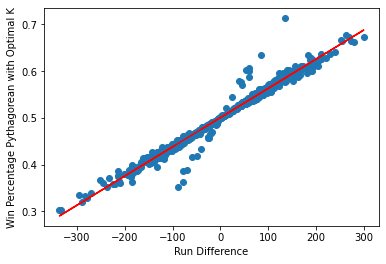

In [303]:
x = my_teams['RD']
y = my_teams['Wpct_k']
LR = LinearRegression()
LR.fit(x.array.reshape(-1, 1), y)
a = LR.coef_
b = LR.intercept_
plt.scatter(x, y)
plt.plot(x, a*x + b, color = 'red')
plt.xlabel('Run Difference')
plt.ylabel('Win Percentage Pythagorean with Optimal K')

In [304]:
a

array([0.00062446])

In [305]:
b

0.5005809104341294

In [170]:
glheaders = pd.read_csv('/Users/jeongminjae/Desktop/Analyzing Baseball Data with R/baseball_R-master/data/game_log_header.csv')
gl2021 = pd.read_csv('/Users/jeongminjae/Desktop/Analyzing Baseball Data with R/gl1871_2021/GL2021.TXT')
gl2021.columns = glheaders.columns
gl2021

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,...,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo
0,20210401,0,Thu,SLN,NL,1,CIN,NL,1,11,...,Jonathan India,4,barnt001,Tucker Barnhart,2,castl003,Luis Castillo,1,NaN,Y
1,20210401,0,Thu,LAN,NL,1,COL,NL,1,5,...,Chris Owings,4,hampg001,Garrett Hampson,8,marqg001,German Marquez,1,NaN,Y
2,20210401,0,Thu,TBA,AL,1,MIA,NL,1,1,...,Jorge Alfaro,2,rojam002,Miguel Rojas,6,alcas001,Sandy Alcantara,1,NaN,Y
3,20210401,0,Thu,MIN,AL,1,MIL,NL,1,5,...,Omar Narvaez,2,urial001,Luis Urias,6,woodb005,Brandon Woodruff,1,NaN,Y
4,20210401,0,Thu,ATL,NL,1,PHI,NL,1,2,...,Jean Segura,4,hasea001,Adam Haseley,8,nolaa001,Aaron Nola,1,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,20211003,0,Sun,MIN,AL,162,KCA,AL,162,7,...,Michael Taylor,8,albeh001,Hanser Alberto,4,gallc001,Cam Gallagher,2,NaN,Y
2424,20211003,0,Sun,TBA,AL,162,NYA,AL,162,0,...,Brett Gardner,8,sancg002,Gary Sanchez,2,odorr001,Rougned Odor,5,NaN,Y
2425,20211003,0,Sun,ANA,AL,162,SEA,AL,162,7,...,Jarred Kelenic,8,ralec001,Cal Raleigh,2,moord002,Dylan Moore,7,NaN,Y
2426,20211003,0,Sun,CLE,AL,162,TEX,AL,162,6,...,Nick Solak,10,trevj001,Jose Trevino,2,herny003,Yonny Hernandez,5,NaN,Y


In [171]:
BOS2021_h = gl2021[gl2021['HomeTeam'] == 'BOS']
BOS2021_h['ScoreDiff'] = [i - j for i, j in zip(BOS2021_h['HomeRunsScore'], BOS2021_h['VisitorRunsScored'])]
BOS2021_a = gl2021[gl2021['VisitingTeam'] == 'BOS']
BOS2021_a['ScoreDiff'] = [j - i for i, j in zip(BOS2021_a['HomeRunsScore'], BOS2021_a['VisitorRunsScored'])]
BOS2021 = pd.concat([BOS2021_a, BOS2021_h])[['VisitingTeam', 'HomeTeam', 'VisitorRunsScored', 'HomeRunsScore', 'ScoreDiff']]

BOS2021

/var/folders/j0/v712hm213nqb130pw6p8p37m0000gn/T/ipykernel_6515/2257531111.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOS2021_h['ScoreDiff'] = [i - j for i, j in zip(BOS2021_h['HomeRunsScore'], BOS2021_h['VisitorRunsScored'])]
/var/folders/j0/v712hm213nqb130pw6p8p37m0000gn/T/ipykernel_6515/2257531111.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  BOS2021_a['ScoreDiff'] = [j - i for i, j in zip(BOS2021_a['HomeRunsScore'], BOS2021_a['VisitorRunsScored'])]


,VisitingTeam,HomeTeam,VisitorRunsScored,HomeRunsScore,ScoreDiff
91,BOS,BAL,7,3,4
112,BOS,BAL,6,4,2
126,BOS,BAL,14,9,5
157,BOS,MIN,4,2,2
170,BOS,MIN,3,2,1
...,...,...,...,...,...
2259,NYN,BOS,3,6,3
2273,NYN,BOS,5,12,7
2299,NYA,BOS,8,3,-5
2314,NYA,BOS,5,3,-2


In [172]:
BOS2021['W'] = [True if k > 0 else False for k in BOS2021['ScoreDiff'] ]
BOS2021

,VisitingTeam,HomeTeam,VisitorRunsScored,HomeRunsScore,ScoreDiff,W
91,BOS,BAL,7,3,4,True
112,BOS,BAL,6,4,2,True
126,BOS,BAL,14,9,5,True
157,BOS,MIN,4,2,2,True
170,BOS,MIN,3,2,1,True
...,...,...,...,...,...,...
2259,NYN,BOS,3,6,3,True
2273,NYN,BOS,5,12,7,True
2299,NYA,BOS,8,3,-5,False
2314,NYA,BOS,5,3,-2,False


In [173]:
BOS2021.groupby('W').mean()

,VisitorRunsScored,HomeRunsScore,ScoreDiff
W,,,
False,4.714286,4.400000,-3.685714
True,4.684783,5.532609,3.673913


In [174]:
gl2021

,Date,DoubleHeader,DayOfWeek,VisitingTeam,VisitingTeamLeague,VisitingTeamGameNumber,HomeTeam,HomeTeamLeague,HomeTeamGameNumber,VisitorRunsScored,...,HomeBatting7Name,HomeBatting7Position,HomeBatting8PlayerID,HomeBatting8Name,HomeBatting8Position,HomeBatting9PlayerID,HomeBatting9Name,HomeBatting9Position,AdditionalInfo,AcquisitionInfo
0,20210401,0,Thu,SLN,NL,1,CIN,NL,1,11,...,Jonathan India,4,barnt001,Tucker Barnhart,2,castl003,Luis Castillo,1,NaN,Y
1,20210401,0,Thu,LAN,NL,1,COL,NL,1,5,...,Chris Owings,4,hampg001,Garrett Hampson,8,marqg001,German Marquez,1,NaN,Y
2,20210401,0,Thu,TBA,AL,1,MIA,NL,1,1,...,Jorge Alfaro,2,rojam002,Miguel Rojas,6,alcas001,Sandy Alcantara,1,NaN,Y
3,20210401,0,Thu,MIN,AL,1,MIL,NL,1,5,...,Omar Narvaez,2,urial001,Luis Urias,6,woodb005,Brandon Woodruff,1,NaN,Y
4,20210401,0,Thu,ATL,NL,1,PHI,NL,1,2,...,Jean Segura,4,hasea001,Adam Haseley,8,nolaa001,Aaron Nola,1,NaN,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2423,20211003,0,Sun,MIN,AL,162,KCA,AL,162,7,...,Michael Taylor,8,albeh001,Hanser Alberto,4,gallc001,Cam Gallagher,2,NaN,Y
2424,20211003,0,Sun,TBA,AL,162,NYA,AL,162,0,...,Brett Gardner,8,sancg002,Gary Sanchez,2,odorr001,Rougned Odor,5,NaN,Y
2425,20211003,0,Sun,ANA,AL,162,SEA,AL,162,7,...,Jarred Kelenic,8,ralec001,Cal Raleigh,2,moord002,Dylan Moore,7,NaN,Y
2426,20211003,0,Sun,CLE,AL,162,TEX,AL,162,6,...,Nick Solak,10,trevj001,Jose Trevino,2,herny003,Yonny Hernandez,5,NaN,Y


In [194]:
results = gl2021[['VisitingTeam', 'HomeTeam', 'VisitorRunsScored', 'HomeRunsScore']]
results['Winner'] = [results['VisitingTeam'][l] if results['VisitorRunsScored'][l] > results['HomeRunsScore'][l] else results['HomeTeam'][l] for l in range(0, len(results))]
results['diff'] = [abs(Ho - Vi) for Ho, Vi in zip(results['HomeRunsScore'], results['VisitorRunsScored'])]
results

/var/folders/j0/v712hm213nqb130pw6p8p37m0000gn/T/ipykernel_6515/1583590441.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['Winner'] = [results['VisitingTeam'][l] if results['VisitorRunsScored'][l] > results['HomeRunsScore'][l] else results['HomeTeam'][l] for l in range(0, len(results))]
/var/folders/j0/v712hm213nqb130pw6p8p37m0000gn/T/ipykernel_6515/1583590441.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results['diff'] = [abs(Ho - Vi) for Ho, Vi in zip(results['HomeRunsScore'], results[

,VisitingTeam,HomeTeam,VisitorRunsScored,HomeRunsScore,Winner,diff
0,SLN,CIN,11,6,SLN,5
1,LAN,COL,5,8,COL,3
2,TBA,MIA,1,0,TBA,1
3,MIN,MIL,5,6,MIL,1
4,ATL,PHI,2,3,PHI,1
...,...,...,...,...,...,...
2423,MIN,KCA,7,3,MIN,4
2424,TBA,NYA,0,1,NYA,1
2425,ANA,SEA,7,3,ANA,4
2426,CLE,TEX,6,0,CLE,6


In [195]:
diff_1 = results[results['diff'] <= 2]
one_run_win = diff_1.groupby('Winner').count()[['diff']]
one_run_win = one_run_win.reset_index()
one_run_win = one_run_win.replace('ANA', 'LAA')
one_run_win.columns = ['teamID', 'one_run_win']
one_run_win

,teamID,one_run_win
0,LAA,37
1,ARI,22
2,ATL,42
3,BAL,24
4,BOS,42
5,CHA,34
6,CHN,37
7,CIN,37
8,CLE,34
9,COL,34


In [196]:
teams2021 = my_teams[my_teams['yearID'] == 2021]
teams2021

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,Wpct_pyt,.resid_pyt,logW,logR
600,ARI,2021,NL,162,52,110,679,893,-214,0.320988,0.366345,-0.045357,-0.749237,-0.273965
601,ATL,2021,NL,161,88,73,790,656,134,0.546584,0.591880,-0.045297,0.186877,0.185872
602,BAL,2021,AL,162,52,110,659,956,-297,0.320988,0.322115,-0.001127,-0.749237,-0.372034
603,BOS,2021,AL,162,92,70,829,749,80,0.567901,0.550567,0.017334,0.273293,0.101481
604,CHA,2021,AL,162,93,69,796,636,160,0.574074,0.610354,-0.036280,0.298493,0.224401
605,CHN,2021,NL,162,71,91,705,839,-134,0.438272,0.413861,0.024410,-0.248180,-0.174013
606,CIN,2021,NL,162,83,79,786,760,26,0.512346,0.516813,-0.004467,0.049393,0.033638
607,CLE,2021,AL,162,80,82,717,727,-10,0.493827,0.493075,0.000752,-0.024693,-0.013851
608,COL,2021,NL,161,74,87,739,796,-57,0.459627,0.462918,-0.003290,-0.161843,-0.074301
609,DET,2021,AL,162,77,85,697,756,-59,0.475309,0.459461,0.015847,-0.098846,-0.081256


In [197]:
results = pd.merge(left = teams2021, right = one_run_win, how = 'inner', on = 'teamID')
results

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,Wpct_pyt,.resid_pyt,logW,logR,one_run_win
0,ARI,2021,NL,162,52,110,679,893,-214,0.320988,0.366345,-0.045357,-0.749237,-0.273965,22
1,ATL,2021,NL,161,88,73,790,656,134,0.546584,0.591880,-0.045297,0.186877,0.185872,42
2,BAL,2021,AL,162,52,110,659,956,-297,0.320988,0.322115,-0.001127,-0.749237,-0.372034,24
3,BOS,2021,AL,162,92,70,829,749,80,0.567901,0.550567,0.017334,0.273293,0.101481,42
4,CHA,2021,AL,162,93,69,796,636,160,0.574074,0.610354,-0.036280,0.298493,0.224401,34
5,CHN,2021,NL,162,71,91,705,839,-134,0.438272,0.413861,0.024410,-0.248180,-0.174013,37
6,CIN,2021,NL,162,83,79,786,760,26,0.512346,0.516813,-0.004467,0.049393,0.033638,37
7,CLE,2021,AL,162,80,82,717,727,-10,0.493827,0.493075,0.000752,-0.024693,-0.013851,34
8,COL,2021,NL,161,74,87,739,796,-57,0.459627,0.462918,-0.003290,-0.161843,-0.074301,34
9,DET,2021,AL,162,77,85,697,756,-59,0.475309,0.459461,0.015847,-0.098846,-0.081256,39


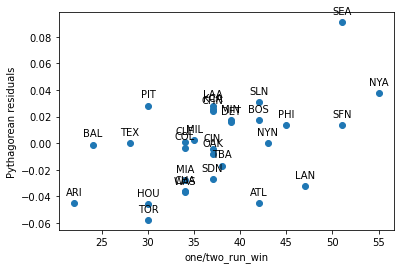

In [199]:
x4 = results['one_run_win']
y4 = results['.resid_pyt']
plt.scatter(x4, y4)
cnt = 0
for x4_, y4_ in zip(x4, y4) :
    plt.annotate(results['teamID'][cnt], (x4_, y4_), textcoords = 'offset points', xytext =  (0, 8), ha = 'center')
    cnt += 1
plt.xlabel('one/two_run_win')
plt.ylabel('Pythagorean residuals')
plt.show()

In [129]:
## 1점차 승리가 많을수록 피타고라스 승리공식의 오차가 커진다
## 1점차 승리가 가장 적은 SDN 과 가장 많은 SFN 을 비교하는데, 1점차 승리가 많을수록 뛰어난 closer 를 보유하고 있을 것이다는 가정을 증명하고자 한다

In [247]:
Pitching = pd.read_csv('/Users/jeongminjae/Desktop/Analyzing Baseball Data with R/baseball_R-master/data/lahman/baseballdatabank-2022.2/core/Pitching.csv')
top_closers = Pitching[(Pitching['GF'] > 10) & (Pitching['ERA'] < 2)][['playerID', 'yearID', 'teamID']]
top_closers = top_closers[top_closers['yearID'] == 2021]
top_closers

,playerID,yearID,teamID
48461,barlojo01,2021,TEX
48574,claseem01,2021,CLE
48756,graveke01,2021,SEA
48780,haderjo01,2021,MIL
48883,kimbrcr01,2021,CHN
48890,kittran01,2021,TBA
48922,leonedo01,2021,SFN
48987,mchugco01,2021,TBA
49297,suarera01,2021,PHI
49386,whitlga01,2021,BOS


In [248]:
results

#results = pd.merge(left = teams2011, right = one_run_win, how = 'inner', on = 'teamID')

,teamID,yearID,lgID,G,W,L,R,RA,RD,Wpct,Wpct_pyt,.resid_pyt,logW,logR,one_run_win
0,ARI,2021,NL,162,52,110,679,893,-214,0.320988,0.366345,-0.045357,-0.749237,-0.273965,22
1,ATL,2021,NL,161,88,73,790,656,134,0.546584,0.591880,-0.045297,0.186877,0.185872,42
2,BAL,2021,AL,162,52,110,659,956,-297,0.320988,0.322115,-0.001127,-0.749237,-0.372034,24
3,BOS,2021,AL,162,92,70,829,749,80,0.567901,0.550567,0.017334,0.273293,0.101481,42
4,CHA,2021,AL,162,93,69,796,636,160,0.574074,0.610354,-0.036280,0.298493,0.224401,34
5,CHN,2021,NL,162,71,91,705,839,-134,0.438272,0.413861,0.024410,-0.248180,-0.174013,37
6,CIN,2021,NL,162,83,79,786,760,26,0.512346,0.516813,-0.004467,0.049393,0.033638,37
7,CLE,2021,AL,162,80,82,717,727,-10,0.493827,0.493075,0.000752,-0.024693,-0.013851,34
8,COL,2021,NL,161,74,87,739,796,-57,0.459627,0.462918,-0.003290,-0.161843,-0.074301,34
9,DET,2021,AL,162,77,85,697,756,-59,0.475309,0.459461,0.015847,-0.098846,-0.081256,39


In [249]:
top_closers = pd.merge(left = top_closers, right = results, on = 'teamID')
top_closers

,playerID,yearID_x,teamID,yearID_y,lgID,G,W,L,R,RA,RD,Wpct,Wpct_pyt,.resid_pyt,logW,logR,one_run_win
0,barlojo01,2021,TEX,2021,AL,162,60,102,625,815,-190,0.370370,0.370313,0.000057,-0.530628,-0.265436,28
1,claseem01,2021,CLE,2021,AL,162,80,82,717,727,-10,0.493827,0.493075,0.000752,-0.024693,-0.013851,34
2,graveke01,2021,SEA,2021,AL,162,90,72,697,748,-51,0.555556,0.464750,0.090806,0.223144,-0.070618,51
3,haderjo01,2021,MIL,2021,NL,162,95,67,738,623,115,0.586420,0.583898,0.002522,0.349184,0.169397,35
4,kimbrcr01,2021,CHN,2021,NL,162,71,91,705,839,-134,0.438272,0.413861,0.024410,-0.248180,-0.174013,37
5,kittran01,2021,TBA,2021,AL,162,100,62,857,651,206,0.617284,0.634102,-0.016818,0.478036,0.274928,38
6,mchugco01,2021,TBA,2021,AL,162,100,62,857,651,206,0.617284,0.634102,-0.016818,0.478036,0.274928,38
7,leonedo01,2021,SFN,2021,NL,162,107,55,804,594,210,0.660494,0.646900,0.013594,0.665496,0.302720,51
8,suarera01,2021,PHI,2021,NL,162,82,80,734,745,-11,0.506173,0.492563,0.013610,0.024693,-0.014875,45
9,whitlga01,2021,BOS,2021,AL,162,92,70,829,749,80,0.567901,0.550567,0.017334,0.273293,0.101481,42


In [246]:
top_closers['.resid_pyt'].mean()

0.012944851444548378

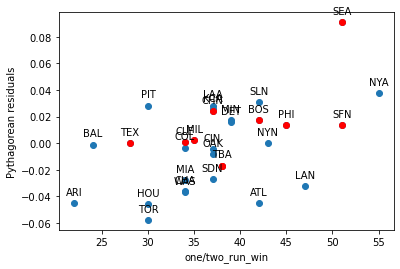

In [251]:
x4 = results['one_run_win']
y4 = results['.resid_pyt']
plt.scatter(x4, y4)
cnt = 0
for x4_, y4_ in zip(x4, y4) :
    plt.annotate(results['teamID'][cnt], (x4_, y4_), textcoords = 'offset points', xytext =  (0, 8), ha = 'center')
    cnt += 1
x5 = top_closers['one_run_win']
y5 = top_closers['.resid_pyt']
for x5_, y5_ in zip(x5, y5) :
    plt.scatter(x5_, y5_, color = 'red')
plt.xlabel('one/two_run_win')
plt.ylabel('Pythagorean residuals')
plt.show()

In [307]:
### KBO 버전